Purpose:

Predict if credit is "Good" or "Bad"

Business related questions:

- What are some of the features that people with "Good" credit have?
- What is the average age of applicants?
- What is the average amount people have in their checking and savings account?
- What is the most common property type?
- what is the most common sex/status with "Good" credit
- Does an applicant's demographics cause a deviation in the predicted category vs. what category they were actually placed in thus suggesting bias?



In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
df = pd.read_csv('german.data', sep='\s+')
df.head(2)

,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1.1
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1


In [130]:
column_names = ['checking_account', 'duration_month', 'credit_history', 'credit_purpose','credit_amount','savings_account','present_employment','disposable_income_percent',
 'status_sex','debtors','residence_since','property','age','other_installments', 'housing','credits_at_current_bank','job','dependants','telephone', 'foreign_worker','class']

In [131]:
df.columns = column_names
df.head(2)

,checking_account,duration_month,credit_history,credit_purpose,credit_amount,savings_account,present_employment,disposable_income_percent,status_sex,debtors,...,property,age,other_installments,housing,credits_at_current_bank,job,dependants,telephone,foreign_worker,class
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   checking_account           999 non-null    object
 1   duration_month             999 non-null    int64 
 2   credit_history             999 non-null    object
 3   credit_purpose             999 non-null    object
 4   credit_amount              999 non-null    int64 
 5   savings_account            999 non-null    object
 6   present_employment         999 non-null    object
 7   disposable_income_percent  999 non-null    int64 
 8   status_sex                 999 non-null    object
 9   debtors                    999 non-null    object
 10  residence_since            999 non-null    int64 
 11  property                   999 non-null    object
 12  age                        999 non-null    int64 
 13  other_installments         999 non-null    object
 14  housing   

In [133]:
df.describe()

,duration_month,credit_amount,disposable_income_percent,residence_since,age,credits_at_current_bank,dependants,class
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,20.917918,3273.362362,2.971972,2.843844,35.514515,1.406406,1.155155,1.300300
std,12.055619,2823.365811,1.118802,1.103665,11.337487,0.577639,0.362234,0.458618
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1368.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2320.000000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.500000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


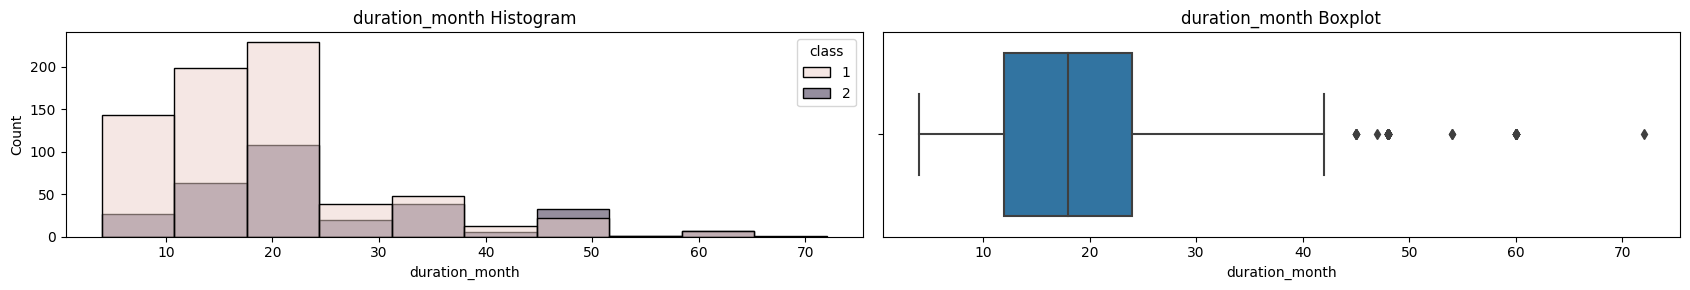

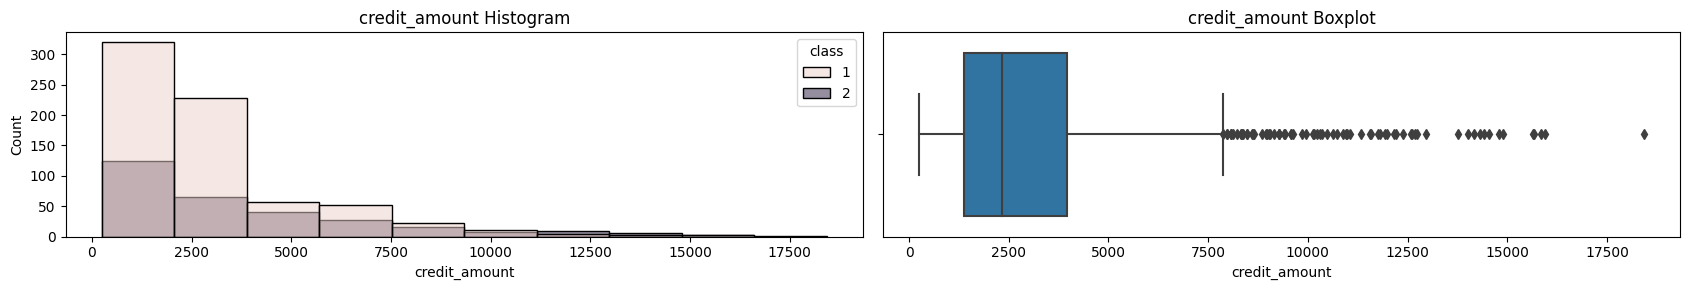

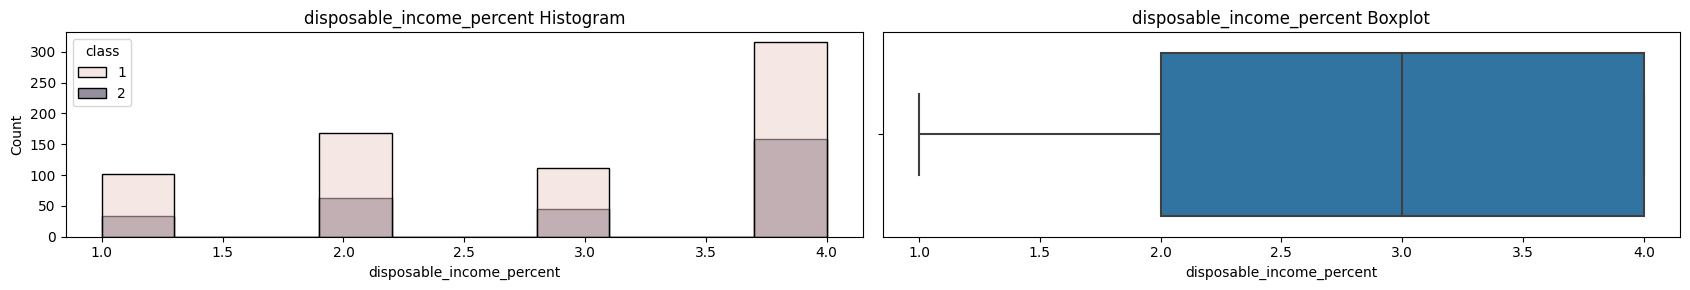

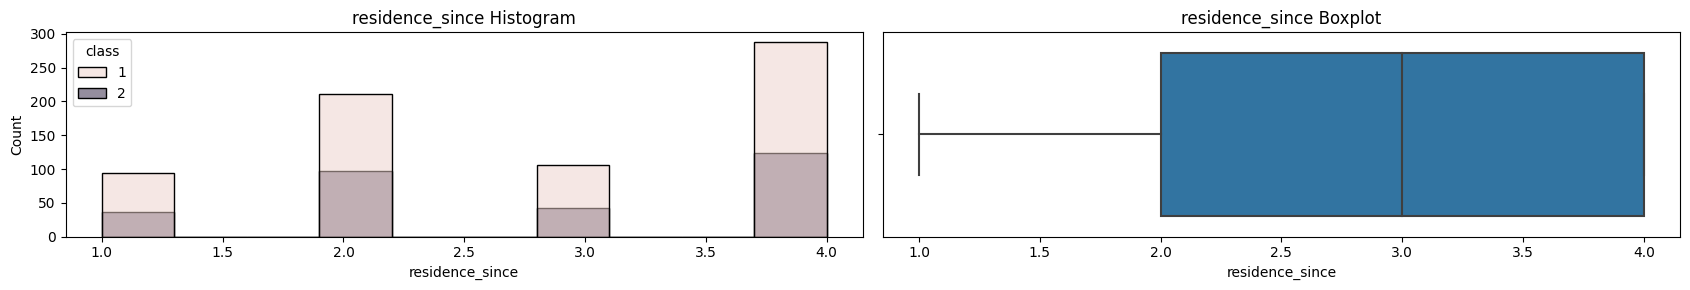

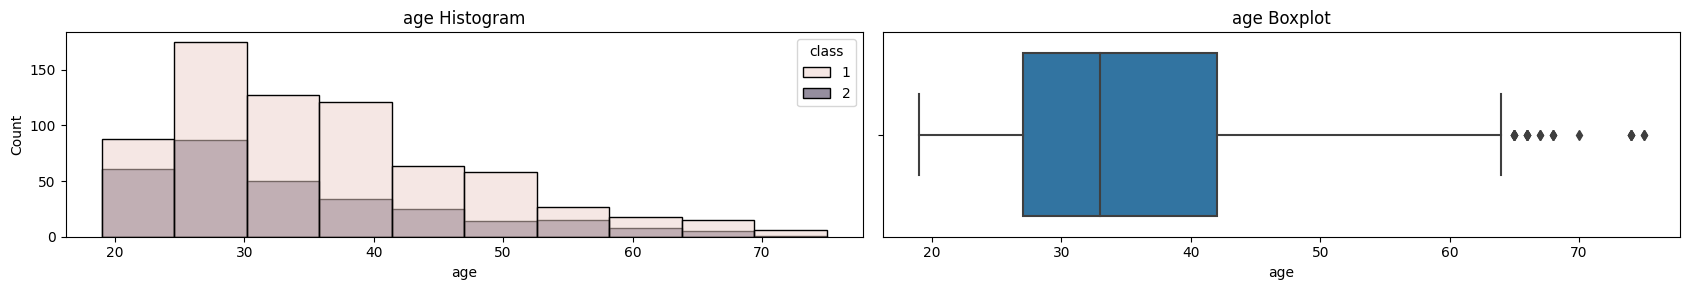

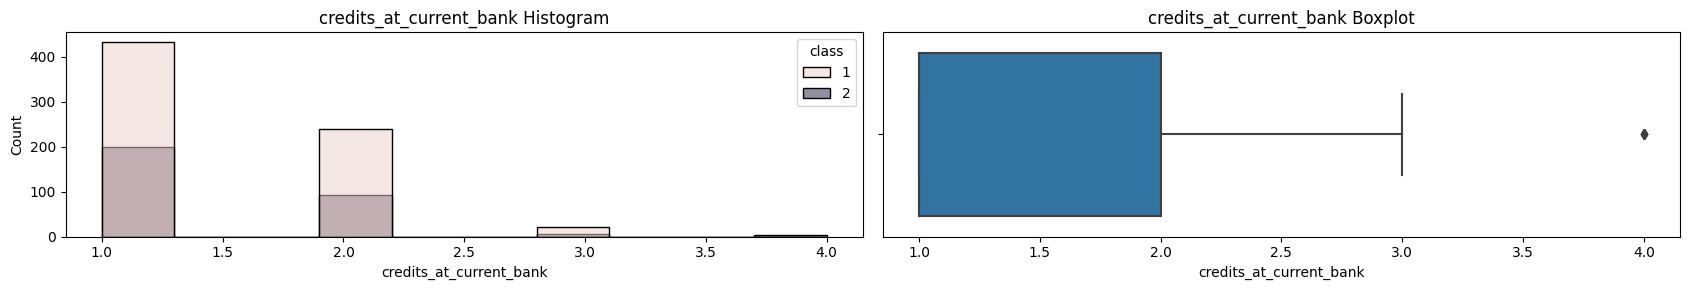

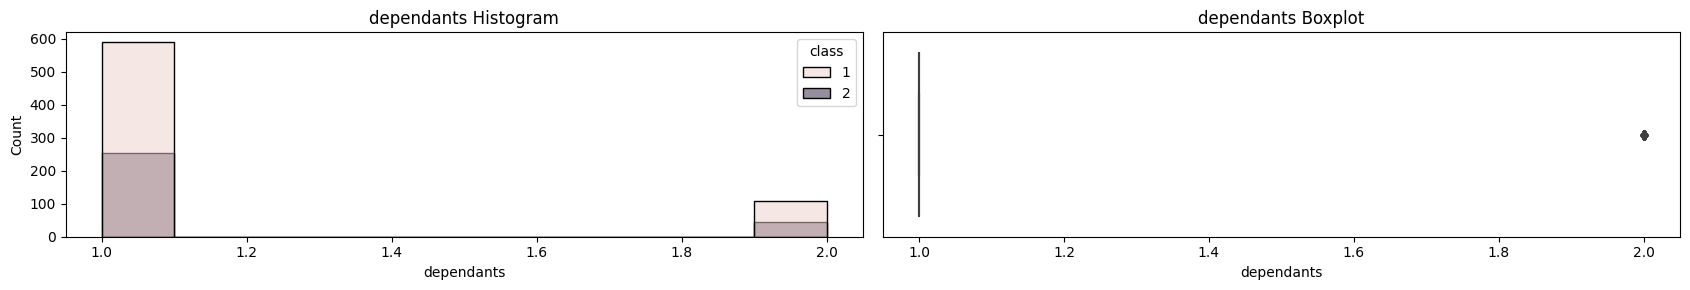

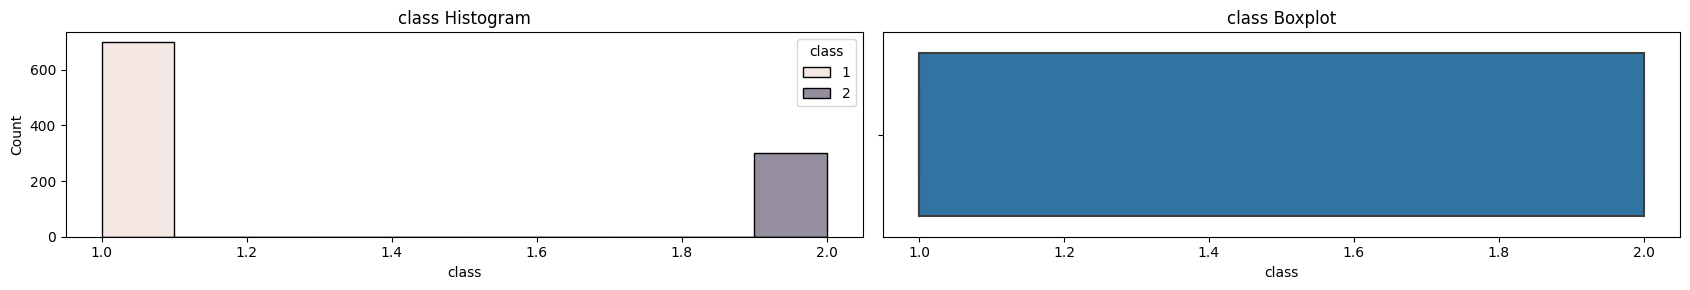

In [134]:
for i in df.columns:
    if df[i].dtype == 'int64':
        fig, ax = plt.subplots(1, 2, figsize=(17, 3))

        sns.histplot(data=df, x=i, bins=10, ax=ax[0], hue='class')
        ax[0].set_title(f'{i} Histogram')
      

        sns.boxplot(data=df, x=i, ax=ax[1])
        ax[1].set_title(f'{i} Boxplot')
   
        plt.tight_layout()
        plt.show();

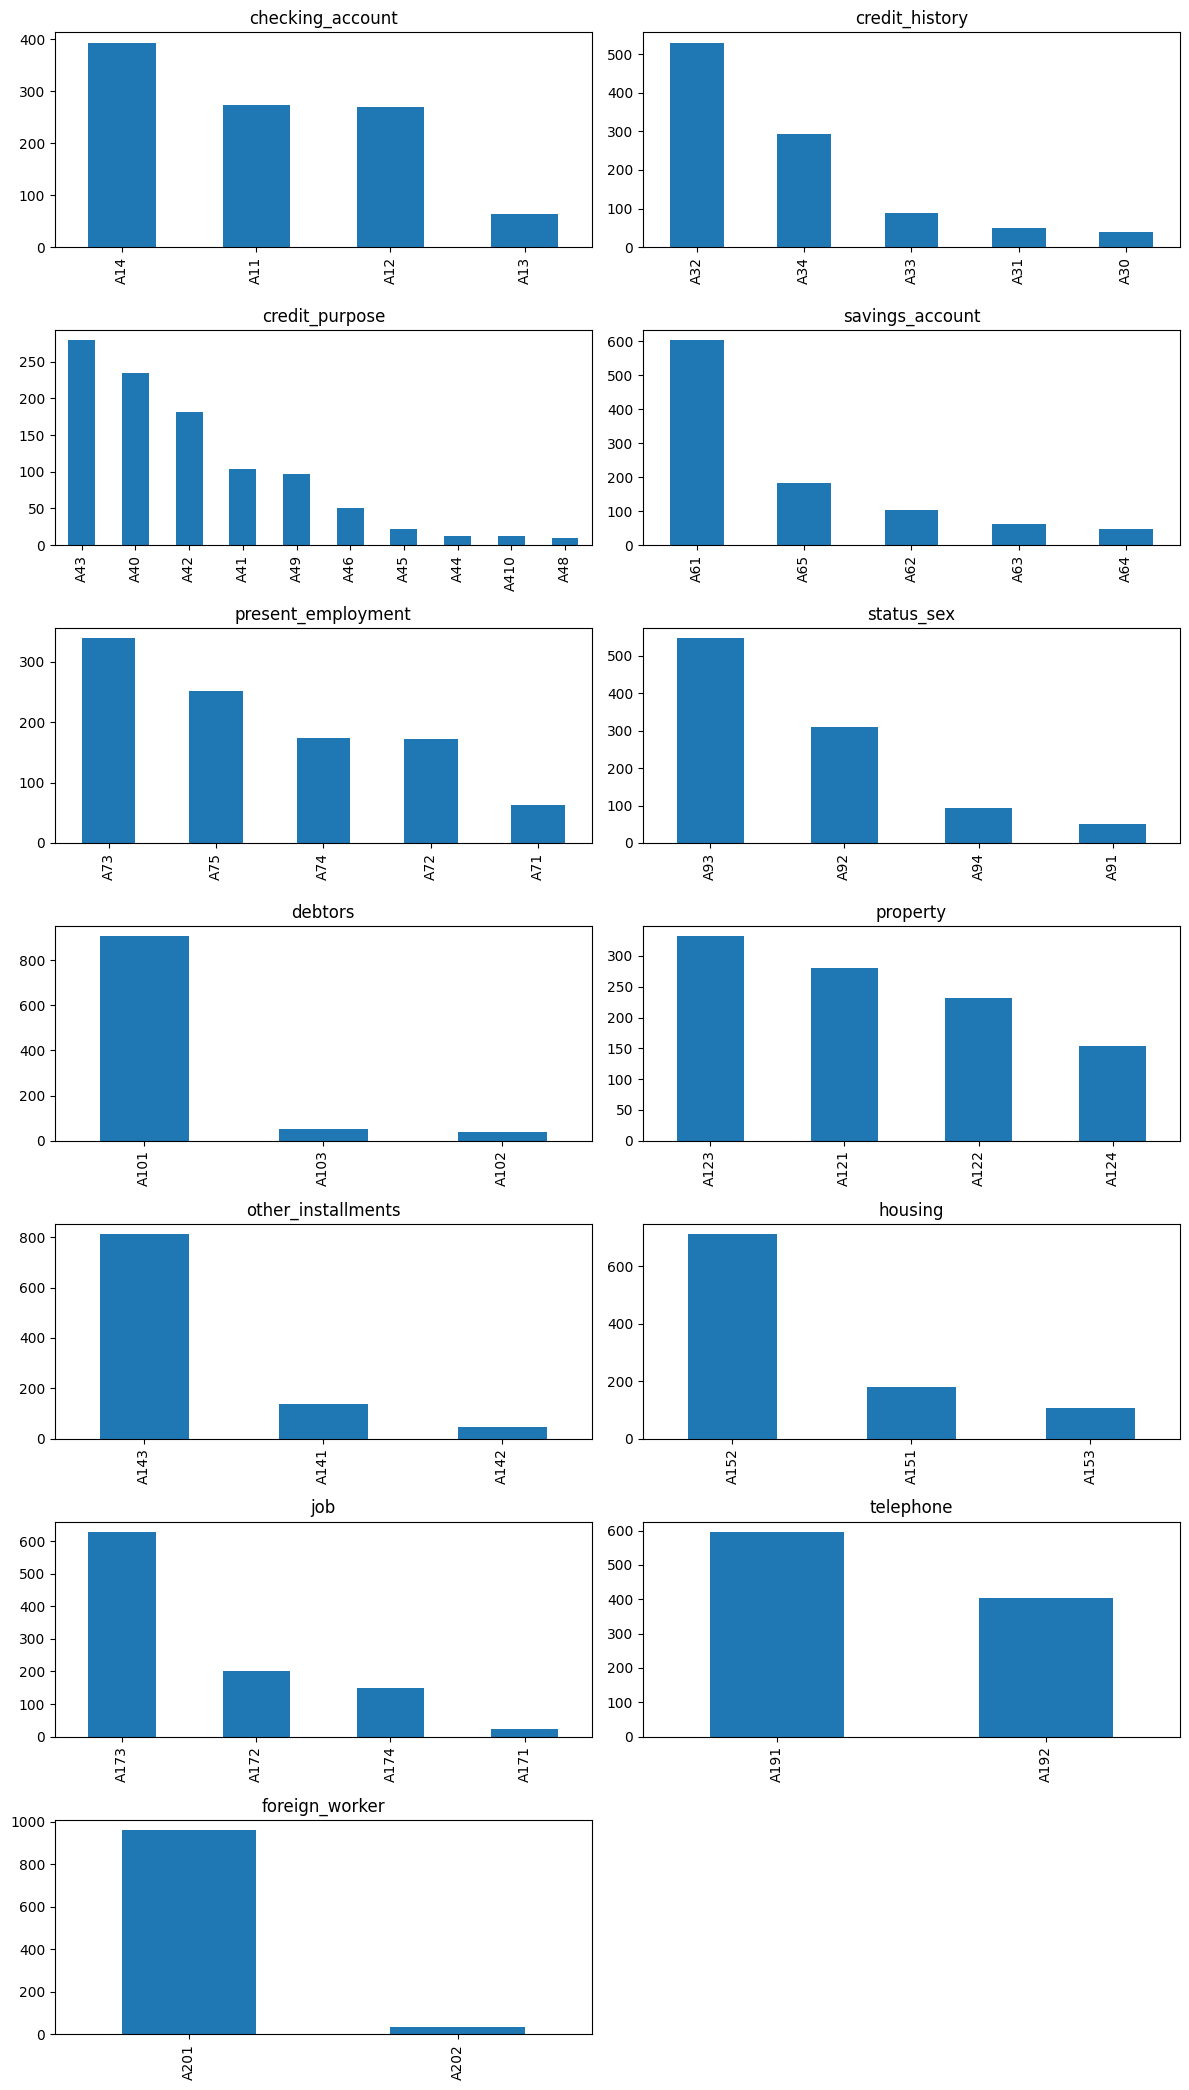

In [135]:
object_columns = df.select_dtypes(include='object').columns

num_rows = (len(object_columns) + 1) // 2  

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 3*num_rows))

axes = axes.flatten()

for i, col in enumerate(object_columns):
    df[col].value_counts().plot(kind='bar', ax=axes[i],)
    axes[i].set_title(col)

for i in range(len(object_columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

<AxesSubplot:>

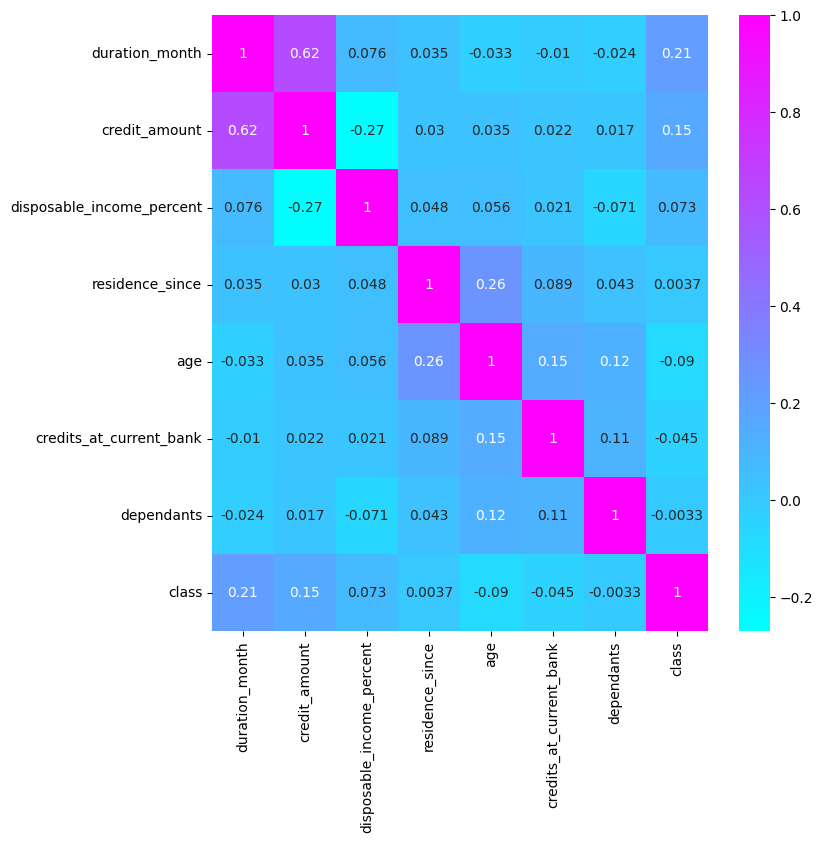

In [136]:
corr_matr = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_matr, cmap= 'cool', annot= True)

### Analayzing Good vs Bad Credit

In [137]:
bad_credit = df[df['class'] == 2]
good_credit = df[df['class'] == 1]

In [138]:
bad_credit.groupby('credits_at_current_bank').mean()

,duration_month,credit_amount,disposable_income_percent,residence_since,age,dependants,class
credits_at_current_bank,,,,,,,
1,24.335000,3751.870000,3.150000,2.770000,33.250000,1.135000,2.0
2,26.076087,4313.076087,3.032609,2.956522,35.054348,1.184783,2.0
3,24.000000,4204.000000,2.333333,3.500000,40.833333,1.333333,2.0
4,24.000000,4518.500000,3.000000,4.000000,34.500000,1.000000,2.0


In [139]:
good_credit.groupby('credits_at_current_bank').mean()

,duration_month,credit_amount,disposable_income_percent,residence_since,age,dependants,class
credits_at_current_bank,,,,,,,
1,19.166282,2963.034642,2.856813,2.806005,35.247113,1.129330,1.0
2,19.858333,3043.820833,3.029167,2.850000,36.716667,1.179167,1.0
3,13.454545,3008.772727,2.727273,3.272727,45.545455,1.363636,1.0
4,19.500000,2236.750000,4.000000,3.750000,53.500000,1.500000,1.0


***Observations:***
- The **average credit amount** in people with bad credit tends to me more in general in comparison to people with good credit. In other words, bad credit has more accounts open and ask for more money
- The **average age** of people with 4 or more credit accounts in the current bank is 53 years old with good credit and 34.5 years old with bad credit 
- We can drop the dependants and residence_since. These features are very similar between people with good and bad credit. 


In [140]:
df = df.drop(columns=['dependants', 'residence_since'], axis= 1)

In [141]:
print(f'Good credit:\n{good_credit.savings_account.value_counts()}')
print(f'Bad Credit:\n{bad_credit.savings_account.value_counts()}')
print(f'Good credit:\n{good_credit.checking_account.value_counts()}')
print(f'Bad Credit:\n{bad_credit.checking_account.value_counts()}')

Good credit:
A61    386
A65    150
A62     69
A63     52
A64     42
Name: savings_account, dtype: int64
Bad Credit:
A61    217
A62     34
A65     32
A63     11
A64      6
Name: savings_account, dtype: int64
Good credit:
A14    348
A12    164
A11    138
A13     49
Name: checking_account, dtype: int64
Bad Credit:
A11    135
A12    105
A14     46
A13     14
Name: checking_account, dtype: int64


***Observations:***
- People with good credit do not have checking account at the current bank, while people wioth bad credit have more accoutns open
- For the people that do have an account open, people with good credit have more than 200 DM in their account

***Maybe We should consider using one-hot encoding on checking account***

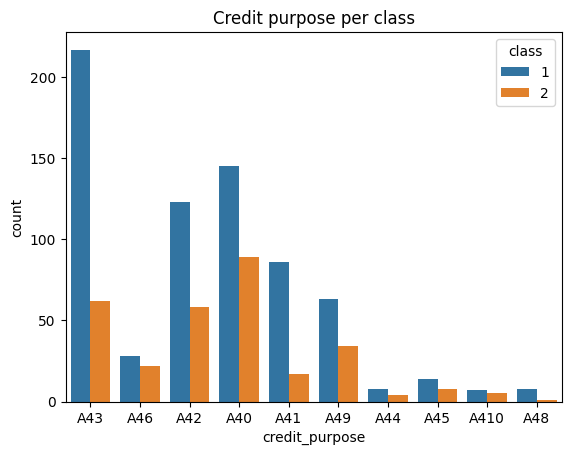

In [142]:
sns.countplot(x ='credit_purpose',hue='class', data= df)
plt.title('Credit purpose per class')
plt.show();

Attribute 4:  (qualitative)
	      Purpose
	      A40 : car (new)
	      A41 : car (used)
	      A42 : furniture/equipment
	      A43 : radio/television
	      A44 : domestic appliances
	      A45 : repairs
	      A46 : education
	      A47 : (vacation - does not exist?)
	      A48 : retraining
	      A49 : business
	      A410 : others


***Observations:***
- Class 1(good) use their credit for radio and televisions, while people with bad credit tend to use their credit mostly for purchasing a car. Another interesiting fact is that people with good credit tend to use their credit for business purposes.

***We should use one-hot encoding for credit purpose***

In [143]:
df_encoded = pd.get_dummies(df, columns=['credit_purpose'], prefix= 'credit_purpose')
df_encoded.columns 

Index(['checking_account', 'duration_month', 'credit_history', 'credit_amount',
       'savings_account', 'present_employment', 'disposable_income_percent',
       'status_sex', 'debtors', 'property', 'age', 'other_installments',
       'housing', 'credits_at_current_bank', 'job', 'telephone',
       'foreign_worker', 'class', 'credit_purpose_A40', 'credit_purpose_A41',
       'credit_purpose_A410', 'credit_purpose_A42', 'credit_purpose_A43',
       'credit_purpose_A44', 'credit_purpose_A45', 'credit_purpose_A46',
       'credit_purpose_A48', 'credit_purpose_A49'],
      dtype='object')

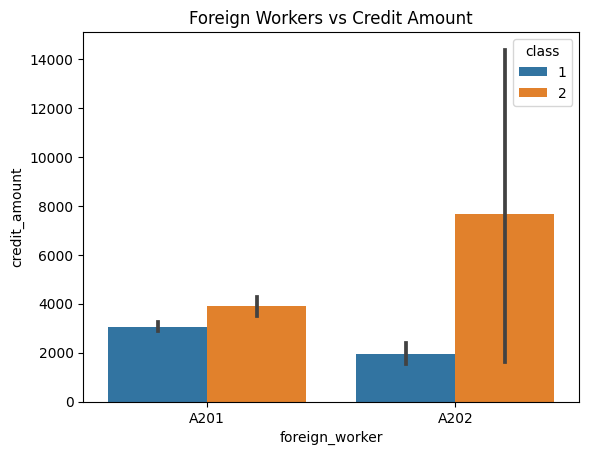

In [144]:
sns.barplot(x = 'foreign_worker', y ='credit_amount', data = df,  hue='class')
plt.title('Foreign Workers vs Credit Amount')
plt.show()

foreign worker:

A201 : yes

A202 : no

***Observations:***
- Foreign workers, tend to ask higher amnounts of credit and tend to have a population with higher bad credit history

**Since Foreign workers tend to have bad credit we shuold encode this categorical variable***

In [145]:
df_encoded = pd.get_dummies(df_encoded, columns=['foreign_worker'], drop_first=True, prefix='Foreign') # Dropping Foreign Column to Avoid Multicolinearity

In [146]:
df_encoded.columns

Index(['checking_account', 'duration_month', 'credit_history', 'credit_amount',
       'savings_account', 'present_employment', 'disposable_income_percent',
       'status_sex', 'debtors', 'property', 'age', 'other_installments',
       'housing', 'credits_at_current_bank', 'job', 'telephone', 'class',
       'credit_purpose_A40', 'credit_purpose_A41', 'credit_purpose_A410',
       'credit_purpose_A42', 'credit_purpose_A43', 'credit_purpose_A44',
       'credit_purpose_A45', 'credit_purpose_A46', 'credit_purpose_A48',
       'credit_purpose_A49', 'Foreign_A202'],
      dtype='object')

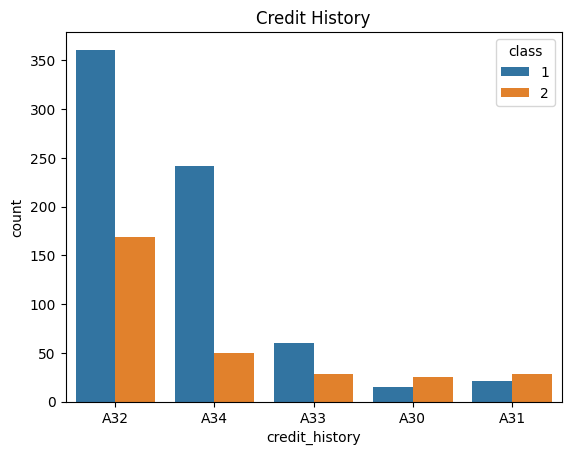

In [147]:
sns.countplot(x = 'credit_history', data=df, hue ='class')
plt.title('Credit History')
plt.show();

Credit history

	A30 : no credits taken/
		all credits paid back duly
              
    A31 : all credits at this bank paid back duly

	A32 : existing credits paid back duly till now
              
    A33 : delay in paying off in the past
	      
    A34 : critical account/
		other credits existing (not at this bank)

***Observations:***
- Although the majority of people with good and bad credit tend to pay off all their debt. There is a significant amount of people with bad debt that have accounts classified as critical in other banks. This could mean that they are looking to get more credit with bad history in other banks


In [148]:
df.columns

Index(['checking_account', 'duration_month', 'credit_history',
       'credit_purpose', 'credit_amount', 'savings_account',
       'present_employment', 'disposable_income_percent', 'status_sex',
       'debtors', 'property', 'age', 'other_installments', 'housing',
       'credits_at_current_bank', 'job', 'telephone', 'foreign_worker',
       'class'],
      dtype='object')

In [149]:
df_encoded = pd.get_dummies(df_encoded, columns=['credit_history'], prefix='credit_history') # Dropping Foreign Column to Avoid Multicolinearity

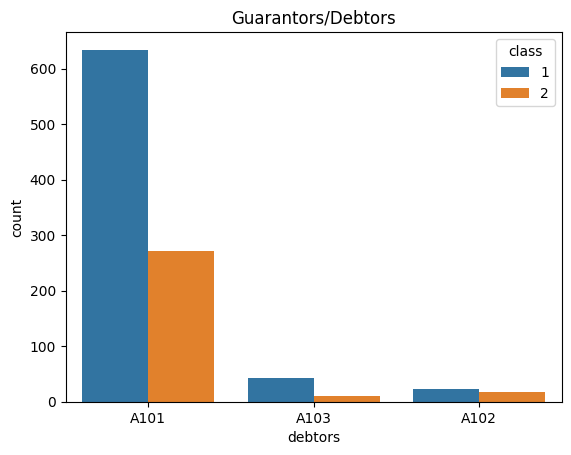

In [150]:
sns.countplot(data=df, x='debtors', hue='class')
plt.title('Guarantors/Debtors')
plt.show()

Other debtors / guarantors

	      A101 : none

	      A102 : co-applicant

	      A103 : guarantor

***We can eliminate this column***

In [151]:
df_encoded = df_encoded.drop(columns= 'debtors', axis=1)

In [152]:
df_encoded.columns

Index(['checking_account', 'duration_month', 'credit_amount',
       'savings_account', 'present_employment', 'disposable_income_percent',
       'status_sex', 'property', 'age', 'other_installments', 'housing',
       'credits_at_current_bank', 'job', 'telephone', 'class',
       'credit_purpose_A40', 'credit_purpose_A41', 'credit_purpose_A410',
       'credit_purpose_A42', 'credit_purpose_A43', 'credit_purpose_A44',
       'credit_purpose_A45', 'credit_purpose_A46', 'credit_purpose_A48',
       'credit_purpose_A49', 'Foreign_A202', 'credit_history_A30',
       'credit_history_A31', 'credit_history_A32', 'credit_history_A33',
       'credit_history_A34'],
      dtype='object')

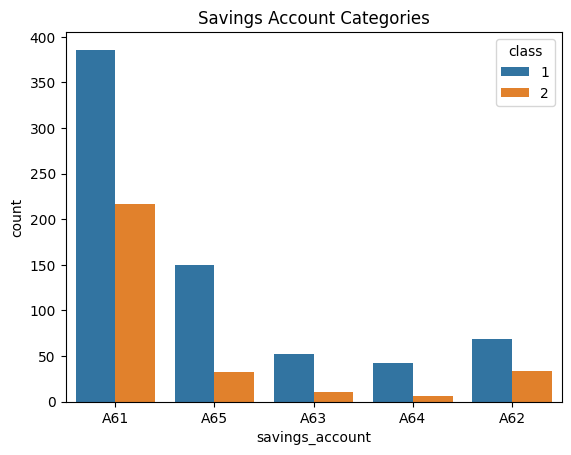

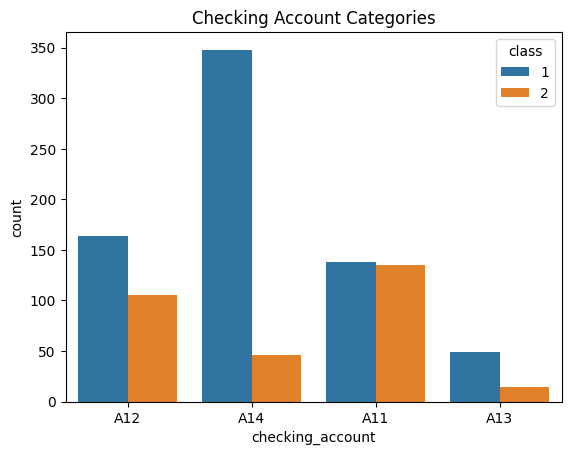

In [153]:
sns.countplot(data = df , x = df['savings_account'], hue='class')
plt.title('Savings Account Categories')
plt.show();
sns.countplot(data = df , x = df['checking_account'], hue='class')
plt.title('Checking Account Categories')
plt.show();

		checking account
		
        A11 :      ... <    0 DM

	    A12 : 0 <= ... <  200 DM

	    A13 :      ... >= 200 DM /
		salary assignments for at least 1 year
		
        A14 : no checking account

  Savings account/bonds

	      A61 :          ... <  100 DM

	      A62 :   100 <= ... <  500 DM

	      A63 :   500 <= ... < 1000 DM

	      A64 :          .. >= 1000 DM
		  
              A65 :   unknown/ no savings account

**We can eliminate the checking and savings account feature. The majority of the people do not have an account at the bank or they have less than 100 DM**

In [154]:
df_encoded = df_encoded.drop(columns=['checking_account', 'savings_account'], axis =1 )
df_encoded.columns

Index(['duration_month', 'credit_amount', 'present_employment',
       'disposable_income_percent', 'status_sex', 'property', 'age',
       'other_installments', 'housing', 'credits_at_current_bank', 'job',
       'telephone', 'class', 'credit_purpose_A40', 'credit_purpose_A41',
       'credit_purpose_A410', 'credit_purpose_A42', 'credit_purpose_A43',
       'credit_purpose_A44', 'credit_purpose_A45', 'credit_purpose_A46',
       'credit_purpose_A48', 'credit_purpose_A49', 'Foreign_A202',
       'credit_history_A30', 'credit_history_A31', 'credit_history_A32',
       'credit_history_A33', 'credit_history_A34'],
      dtype='object')

In [155]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   duration_month             999 non-null    int64 
 1   credit_amount              999 non-null    int64 
 2   present_employment         999 non-null    object
 3   disposable_income_percent  999 non-null    int64 
 4   status_sex                 999 non-null    object
 5   property                   999 non-null    object
 6   age                        999 non-null    int64 
 7   other_installments         999 non-null    object
 8   housing                    999 non-null    object
 9   credits_at_current_bank    999 non-null    int64 
 10  job                        999 non-null    object
 11  telephone                  999 non-null    object
 12  class                      999 non-null    int64 
 13  credit_purpose_A40         999 non-null    uint8 
 14  credit_pur

***Dropping telephone***

In [156]:
df_encoded = df_encoded.drop(columns='telephone' , axis= 1)

In [157]:
df_encoded.groupby('class')['credits_at_current_bank'].value_counts()

class  credits_at_current_bank
1      1                          433
       2                          240
       3                           22
       4                            4
2      1                          200
       2                           92
       3                            6
       4                            2
Name: credits_at_current_bank, dtype: int64

In [158]:
df['class'].value_counts()

1    699
2    300
Name: class, dtype: int64

***Double of the amount of people with good credit have only one account open at the current bank in comparison to people with bad credit***

In [159]:
df_encoded = pd.get_dummies(df_encoded, columns=['credits_at_current_bank'], prefix='current_bank_credit') 
df_encoded.columns

Index(['duration_month', 'credit_amount', 'present_employment',
       'disposable_income_percent', 'status_sex', 'property', 'age',
       'other_installments', 'housing', 'job', 'class', 'credit_purpose_A40',
       'credit_purpose_A41', 'credit_purpose_A410', 'credit_purpose_A42',
       'credit_purpose_A43', 'credit_purpose_A44', 'credit_purpose_A45',
       'credit_purpose_A46', 'credit_purpose_A48', 'credit_purpose_A49',
       'Foreign_A202', 'credit_history_A30', 'credit_history_A31',
       'credit_history_A32', 'credit_history_A33', 'credit_history_A34',
       'current_bank_credit_1', 'current_bank_credit_2',
       'current_bank_credit_3', 'current_bank_credit_4'],
      dtype='object')

<AxesSubplot:xlabel='housing', ylabel='count'>

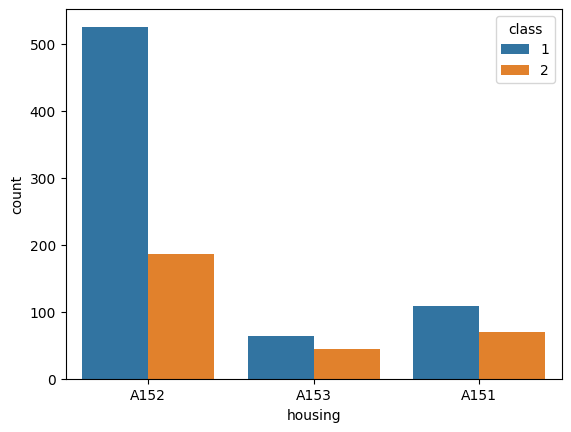

In [160]:
sns.countplot(data=df_encoded, x = 'housing', hue='class')

	      Housing
	      A151 : rent
	      A152 : own
	      A153 : for free

***Owning a home is an important factor for credit approval and usully homeowners need to have a 'decent' credit to own a home***

In [161]:
df_encoded = pd.get_dummies(df_encoded, columns=['housing'], prefix='housing') 
df_encoded.columns

Index(['duration_month', 'credit_amount', 'present_employment',
       'disposable_income_percent', 'status_sex', 'property', 'age',
       'other_installments', 'job', 'class', 'credit_purpose_A40',
       'credit_purpose_A41', 'credit_purpose_A410', 'credit_purpose_A42',
       'credit_purpose_A43', 'credit_purpose_A44', 'credit_purpose_A45',
       'credit_purpose_A46', 'credit_purpose_A48', 'credit_purpose_A49',
       'Foreign_A202', 'credit_history_A30', 'credit_history_A31',
       'credit_history_A32', 'credit_history_A33', 'credit_history_A34',
       'current_bank_credit_1', 'current_bank_credit_2',
       'current_bank_credit_3', 'current_bank_credit_4', 'housing_A151',
       'housing_A152', 'housing_A153'],
      dtype='object')

<AxesSubplot:xlabel='job', ylabel='count'>

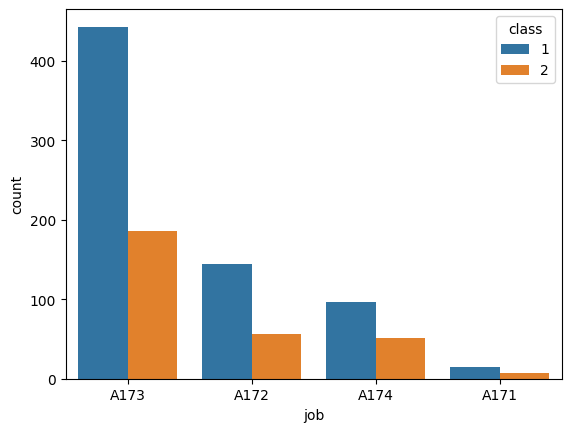

In [162]:
sns.countplot(data=df_encoded, x = 'job', hue = 'class' )

   			Job
	      A171 : unemployed/ unskilled  - non-resident
	      A172 : unskilled - resident
	      A173 : skilled employee / official
	      A174 : management/ self-employed/
		     highly qualified employee/ officer

***The distribution for each class and employment seems proportional, we can omit this category***

In [163]:
df_encoded = df_encoded.drop(columns='job', axis= 1)
df_encoded.columns

Index(['duration_month', 'credit_amount', 'present_employment',
       'disposable_income_percent', 'status_sex', 'property', 'age',
       'other_installments', 'class', 'credit_purpose_A40',
       'credit_purpose_A41', 'credit_purpose_A410', 'credit_purpose_A42',
       'credit_purpose_A43', 'credit_purpose_A44', 'credit_purpose_A45',
       'credit_purpose_A46', 'credit_purpose_A48', 'credit_purpose_A49',
       'Foreign_A202', 'credit_history_A30', 'credit_history_A31',
       'credit_history_A32', 'credit_history_A33', 'credit_history_A34',
       'current_bank_credit_1', 'current_bank_credit_2',
       'current_bank_credit_3', 'current_bank_credit_4', 'housing_A151',
       'housing_A152', 'housing_A153'],
      dtype='object')

<AxesSubplot:xlabel='property', ylabel='count'>

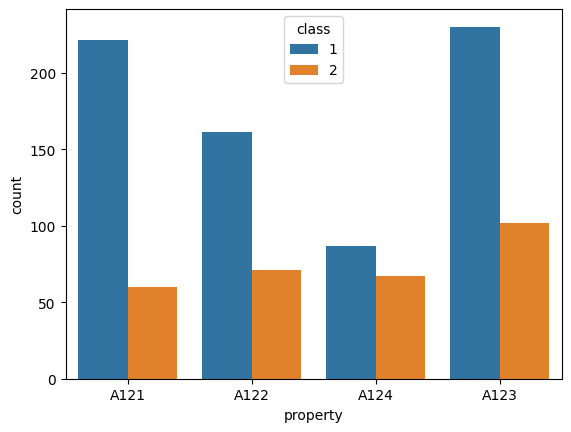

In [164]:
sns.countplot(data=df_encoded, x  = 'property', hue = 'class')

            Property
	      A121 : real estate
	      A122 : if not A121 : building society savings agreement/
				   life insurance
              A123 : if not A121/A122 : car or other, not in attribute 6
	      A124 : unknown / no property

***Encoding this feature because banks tend to look at collaterals when applying for credit lines***

In [165]:
df_encoded = pd.get_dummies(df_encoded, columns=['property'], prefix='property') 
df_encoded.columns

Index(['duration_month', 'credit_amount', 'present_employment',
       'disposable_income_percent', 'status_sex', 'age', 'other_installments',
       'class', 'credit_purpose_A40', 'credit_purpose_A41',
       'credit_purpose_A410', 'credit_purpose_A42', 'credit_purpose_A43',
       'credit_purpose_A44', 'credit_purpose_A45', 'credit_purpose_A46',
       'credit_purpose_A48', 'credit_purpose_A49', 'Foreign_A202',
       'credit_history_A30', 'credit_history_A31', 'credit_history_A32',
       'credit_history_A33', 'credit_history_A34', 'current_bank_credit_1',
       'current_bank_credit_2', 'current_bank_credit_3',
       'current_bank_credit_4', 'housing_A151', 'housing_A152', 'housing_A153',
       'property_A121', 'property_A122', 'property_A123', 'property_A124'],
      dtype='object')

<AxesSubplot:xlabel='status_sex', ylabel='count'>

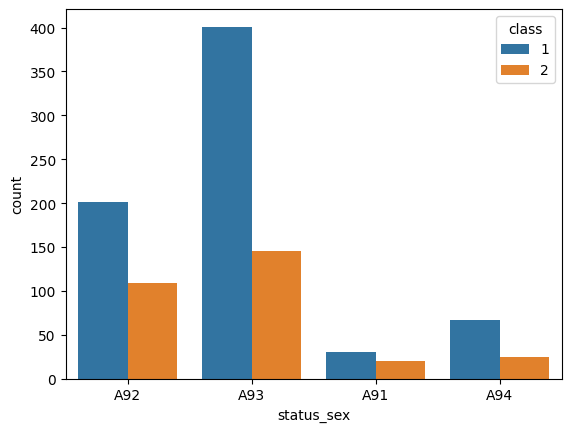

In [166]:
sns.countplot(data=df_encoded, x  = 'status_sex', hue = 'class')

	      Personal status and sex
	      A91 : male   : divorced/separated
	      A92 : female : divorced/separated/married
              A93 : male   : single
	      A94 : male   : married/widowed
	      A95 : female : single

***Encoding this feature becasue you can tell there is a difference betweeing goo/bad credit between male and females***

In [167]:
df_encoded = pd.get_dummies(df_encoded, columns=['status_sex'], prefix='status_sex') 
df_encoded.columns

Index(['duration_month', 'credit_amount', 'present_employment',
       'disposable_income_percent', 'age', 'other_installments', 'class',
       'credit_purpose_A40', 'credit_purpose_A41', 'credit_purpose_A410',
       'credit_purpose_A42', 'credit_purpose_A43', 'credit_purpose_A44',
       'credit_purpose_A45', 'credit_purpose_A46', 'credit_purpose_A48',
       'credit_purpose_A49', 'Foreign_A202', 'credit_history_A30',
       'credit_history_A31', 'credit_history_A32', 'credit_history_A33',
       'credit_history_A34', 'current_bank_credit_1', 'current_bank_credit_2',
       'current_bank_credit_3', 'current_bank_credit_4', 'housing_A151',
       'housing_A152', 'housing_A153', 'property_A121', 'property_A122',
       'property_A123', 'property_A124', 'status_sex_A91', 'status_sex_A92',
       'status_sex_A93', 'status_sex_A94'],
      dtype='object')

<AxesSubplot:xlabel='present_employment', ylabel='count'>

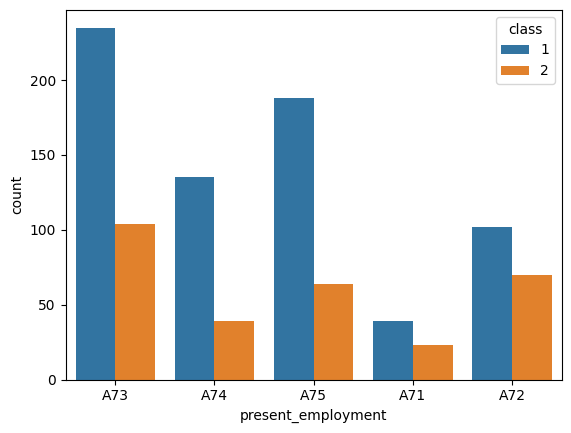

In [168]:
sns.countplot(data=df_encoded, x  = 'present_employment', hue = 'class')

      A71 : unemployed
	      A72 :       ... < 1 year
	      A73 : 1  <= ... < 4 years  
	      A74 : 4  <= ... < 7 years
	      A75 :       .. >= 7 years

***Encoding this feature becasue it is important to have a working history that is stable, it could determine you eligibility for a credit line (domain knowledge)***

In [169]:
df_encoded = pd.get_dummies(df_encoded, columns=['present_employment'], prefix='years_in employment') 
df_encoded.columns

Index(['duration_month', 'credit_amount', 'disposable_income_percent', 'age',
       'other_installments', 'class', 'credit_purpose_A40',
       'credit_purpose_A41', 'credit_purpose_A410', 'credit_purpose_A42',
       'credit_purpose_A43', 'credit_purpose_A44', 'credit_purpose_A45',
       'credit_purpose_A46', 'credit_purpose_A48', 'credit_purpose_A49',
       'Foreign_A202', 'credit_history_A30', 'credit_history_A31',
       'credit_history_A32', 'credit_history_A33', 'credit_history_A34',
       'current_bank_credit_1', 'current_bank_credit_2',
       'current_bank_credit_3', 'current_bank_credit_4', 'housing_A151',
       'housing_A152', 'housing_A153', 'property_A121', 'property_A122',
       'property_A123', 'property_A124', 'status_sex_A91', 'status_sex_A92',
       'status_sex_A93', 'status_sex_A94', 'years_in employment_A71',
       'years_in employment_A72', 'years_in employment_A73',
       'years_in employment_A74', 'years_in employment_A75'],
      dtype='object')

<AxesSubplot:xlabel='other_installments', ylabel='count'>

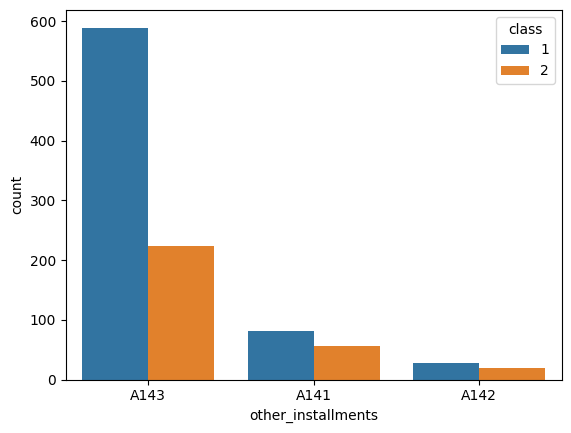

In [170]:
sns.countplot(data=df_encoded, x  = 'other_installments', hue = 'class')

     Other installment plans 
	      A141 : bank
	      A142 : stores
	      A143 : none

***Having Other Installments does not seem that affect wether you have good or bad credit,since the population results look proportional***

In [171]:
df_encoded = df_encoded.drop(columns='other_installments', axis= 1)

In [172]:
df_encoded.head(1)

,duration_month,credit_amount,disposable_income_percent,age,class,credit_purpose_A40,credit_purpose_A41,credit_purpose_A410,credit_purpose_A42,credit_purpose_A43,...,property_A124,status_sex_A91,status_sex_A92,status_sex_A93,status_sex_A94,years_in employment_A71,years_in employment_A72,years_in employment_A73,years_in employment_A74,years_in employment_A75
0,48,5951,2,22,2,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


## Naive Bayes Algorithm With Standardization

In [173]:
x = df_encoded.drop(columns='class',axis =1)

mapping_dict = {1: 1, 2: 0}
df_encoded['class'] = df_encoded['class'].map(mapping_dict)
y = df_encoded['class']
#1 is Good, 0 is bad

In [174]:
y.value_counts()

1    699
0    300
Name: class, dtype: int64

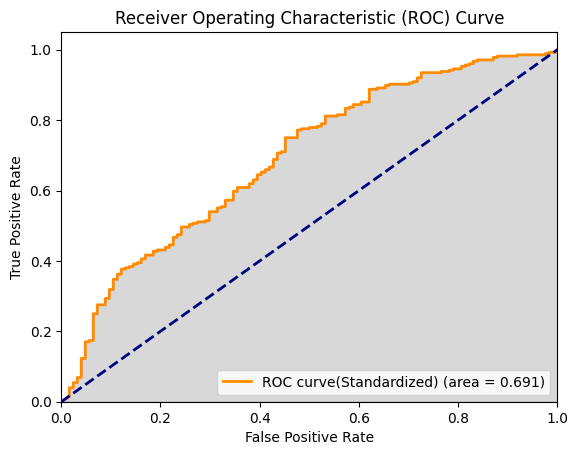

Confusion Matrix


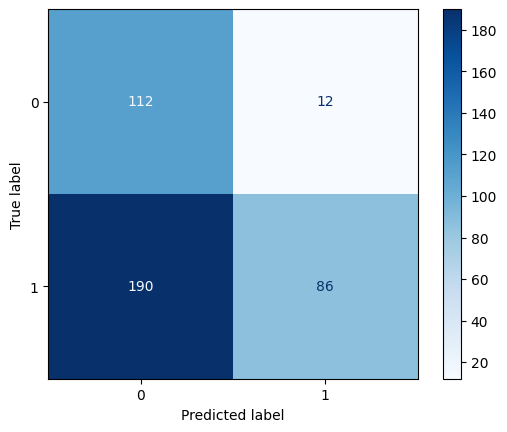

---------------------------
Performance Measures
---------------------------
Precision:, 0.8775510204081632
Recall:, 0.3115942028985507
F1 Score:, 0.45989304812834225
Accuracy Score: 0.495
-----------------------------
Hyperparameter Tuning Results
----------------------------
Best parameters:, {'var_smoothing': 0.0001}
Best score:", 0.47584745762711866
False Positive rate: 0.0967741935483871


In [186]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

#Splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= .60, random_state= 42)

#Standardizing
scaler = StandardScaler()
xtrain_scale = scaler.fit_transform(x_train)
xtest = scaler.transform(x_test)

# Hyperparameter Tuning
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}
grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, cv=10, scoring='accuracy')
grid_search.fit(xtrain_scale, y_train)

# Training
n_b_best = grid_search.best_estimator_
n_b_best.fit(xtrain_scale, y_train)
predictions = n_b_best.predict(xtest)

#Performance
scores = n_b_best.score(xtest, y_test)
conf_mtrx = confusion_matrix(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mtrx)

#Plotting ROC Curve
y_pred_proba = n_b_best.predict_proba(xtest)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)
roc_auc = auc(fpr, tpr)

#Results
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve(Standardized) (area = {round(roc_auc,3)})')
plt.fill_between(fpr, tpr, color='gray', alpha=0.3) 
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show();
print('Confusion Matrix')
disp.plot(cmap='Blues', include_values=True)
plt.show();

print('---------------------------')
print('Performance Measures')
print('---------------------------')
print(f'Precision:, {precision}')
print(f'Recall:, {recall}')
print(f'F1 Score:, {f1}')
print(f'Accuracy Score: {scores}')
print('-----------------------------')
print('Hyperparameter Tuning Results')
print('----------------------------')
print(f'Best parameters:, {grid_search.best_params_}')
print(f'Best score:", {grid_search.best_score_}')
print(f'False Positive rate: {12 / (12+112)}')

### Simulating Best Score

Mean Score: 0.5735175


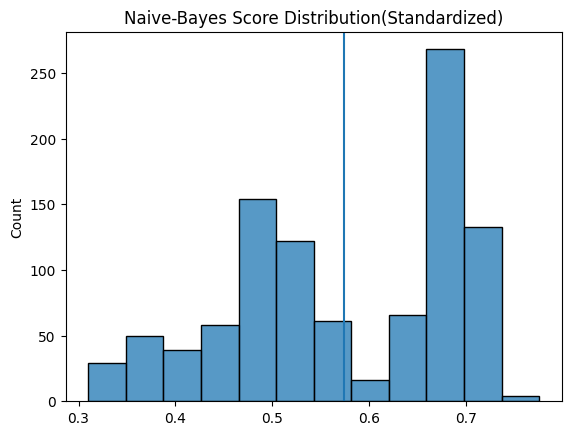

In [176]:
i = 0
n_b_score = []

while i < 1000:
    
    #Splitting
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= .60)
                                                        

    #Standardizing
    scaler = StandardScaler()
    xtrain_scale = scaler.fit_transform(x_train)
    xtest = scaler.transform(x_test)

    # Hyperparameter Tuning
    param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}
    grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, cv=10, scoring='accuracy')
    grid_search.fit(xtrain_scale, y_train)

    # Training
    n_b_best = grid_search.best_estimator_
    n_b_best.fit(xtrain_scale, y_train)
    predictions = n_b_best.predict(xtest)

    #Performance
    scores = n_b_best.score(xtest, y_test)
    n_b_score.append(scores)
    
 

    i += 1
print(f'Mean Score: {np.mean(n_b_score)}')


sns.histplot(data=n_b_score)
plt.title('Naive-Bayes Score Distribution(Standardized)')
plt.axvline(np.mean(n_b_score))
plt.show();


## Naive Bayes Algorithm with Balanced Target and Standardized

Confusion Matrix


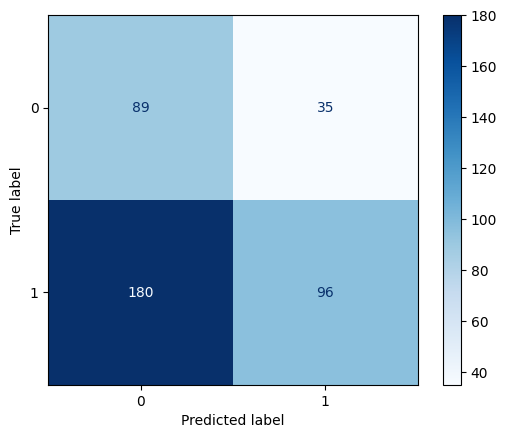

---------------------------
Performance Measures
---------------------------
Precision:, 0.732824427480916
Recall:, 0.34782608695652173
F1 Score:, 0.4717444717444717
Accuracy Score: 0.4625
-----------------------------
Hyperparameter Tuning Results
----------------------------
Best parameters:, {'var_smoothing': 0.0001}
Best score:", 0.6172408963585434
False Positive rate: 0.31451612903225806


In [188]:
#Splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= .60, random_state= 42)

#Balancing
smote = SMOTE()
x_train_, y_train_ =  smote.fit_resample(x_train,y_train)

#Standardizing
scaler = StandardScaler()
xtrain_scale = scaler.fit_transform(x_train_)
xtest = scaler.transform(x_test)

# Hyperparameter Tuning
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}
grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, cv=10, scoring='accuracy')
grid_search.fit(xtrain_scale, y_train_)

# Training
n_b_best = grid_search.best_estimator_
n_b_best.fit(xtrain_scale, y_train_)
predictions= n_b_best.predict(xtest)

#Performance
scores = n_b_best.score(xtest, y_test)
conf_mtrx = confusion_matrix(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mtrx)

#Results
print('Confusion Matrix')
disp.plot(cmap='Blues', include_values=True)
plt.show();

print('---------------------------')
print('Performance Measures')
print('---------------------------')
print(f'Precision:, {precision}')
print(f'Recall:, {recall}')
print(f'F1 Score:, {f1}')
print(f'Accuracy Score: {scores}')
print('-----------------------------')
print('Hyperparameter Tuning Results')
print('----------------------------')
print(f'Best parameters:, {grid_search.best_params_}')
print(f'Best score:", {grid_search.best_score_}')
print(f'False Positive rate: {39 / (39+85)}')

### Simulating Best Score

Mean Score: 0.67355


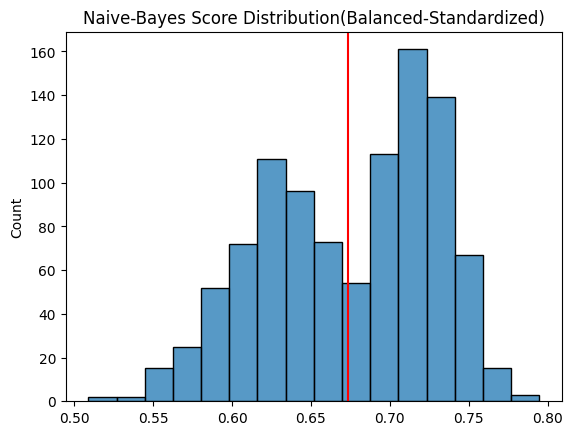

In [178]:
i = 0
n_b_score = []

while i < 1000:
    
   #Balancing
    smote = SMOTE()
    X_resampled, Y_resampled =  smote.fit_resample(x,y)
    
    #Splitting
    x_train, x_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, train_size= .60)
    
    #Standardizing
    scaler = StandardScaler()
    xtrain_scale = scaler.fit_transform(x_train)
    xtest = scaler.transform(x_test)
    
    # Hyperparameter Tuning
    param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}
    grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, cv=10, scoring='accuracy')
    grid_search.fit(xtrain_scale, y_train)
    
    # Training
    n_b_best = grid_search.best_estimator_
    n_b_best.fit(xtrain_scale, y_train)
    predictions= n_b_best.predict(xtest)
    
    #Performance
    scores = n_b_best.score(xtest, y_test)
    n_b_score.append(scores)
    
 

    i += 1
print(f'Mean Score: {np.mean(n_b_score)}')


sns.histplot(data=n_b_score)
plt.title('Naive-Bayes Score Distribution(Balanced-Standardized)')
plt.axvline(np.mean(n_b_score), color = 'red')
plt.show();


## Without Standardization

Confusion Matrix


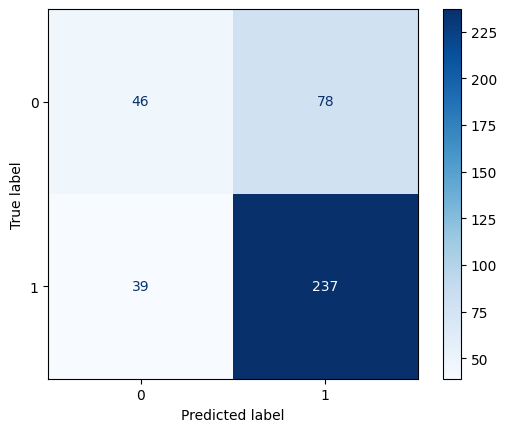

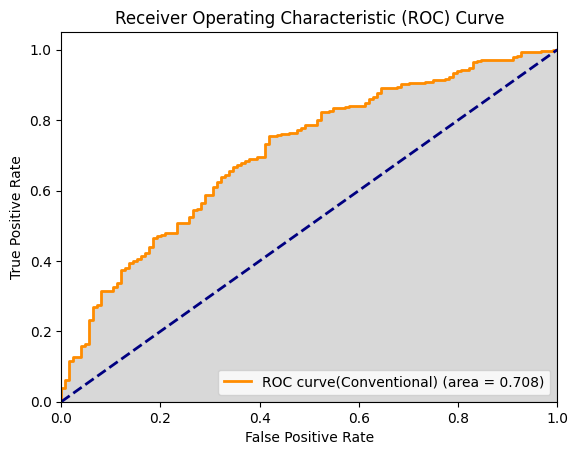

---------------------------
Performance Measures
---------------------------
Precision:, 0.7523809523809524
Recall:, 0.8586956521739131
F1 Score:, 0.802030456852792
Accuracy Score: 0.7075
-----------------------------
Hyperparameter Tuning Results
----------------------------
Best parameters:, {'var_smoothing': 1e-08}
Best score:", 0.7361864406779661
False Positive rate: 0.6290322580645161


In [189]:
#Splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= .60, random_state= 42)

# Hyperparameter Tuning
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}
grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, cv=10, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Training
n_b_best = grid_search.best_estimator_
n_b_best.fit(x_train, y_train)
predictions_ = n_b_best.predict(x_test)

#Performance
scores = n_b_best.score(x_test, y_test)
conf_mtrx = confusion_matrix(y_test, predictions_)
precision = precision_score(y_test, predictions_)
recall = recall_score(y_test, predictions_)
f1 = f1_score(y_test, predictions_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mtrx)

#Results
print('Confusion Matrix')
disp.plot(cmap='Blues', include_values=True)
plt.show();


#Plotting ROC Curve
y_pred_proba = n_b_best.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve(Conventional) (area = {round(roc_auc,3)})')
plt.fill_between(fpr, tpr, color='gray', alpha=0.3) 
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show();

print('---------------------------')
print('Performance Measures')
print('---------------------------')
print(f'Precision:, {precision}')
print(f'Recall:, {recall}')
print(f'F1 Score:, {f1}')
print(f'Accuracy Score: {scores}')
print('-----------------------------')
print('Hyperparameter Tuning Results')
print('----------------------------')
print(f'Best parameters:, {grid_search.best_params_}')
print(f'Best score:", {grid_search.best_score_}')
print(f'False Positive rate: {78 / (78+46)}')

### Simulating Best Score

Mean Score: 0.7245799999999999


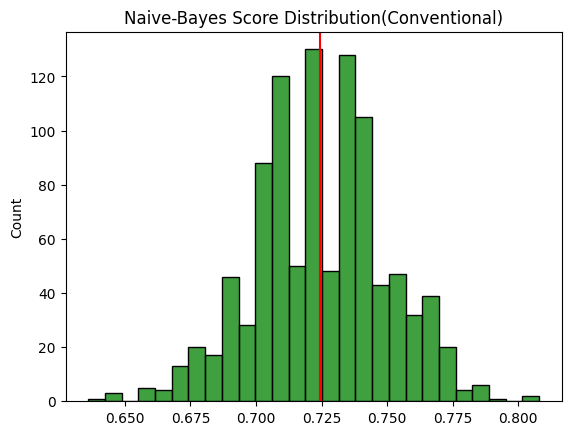

In [180]:
i = 0
n_b_score = []

while i < 1000:
    
    #Splitting
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= .75)
    
    # Hyperparameter Tuning
    param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}
    grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, cv=10, scoring='accuracy')
    grid_search.fit(x_train, y_train)
    
    # Training
    n_b_best = grid_search.best_estimator_
    n_b_best.fit(x_train, y_train)
    predictions= n_b_best.predict(x_test)
    
    #Performance
    scores = n_b_best.score(x_test, y_test)
    n_b_score.append(scores)
    
 

    i += 1
print(f'Mean Score: {np.mean(n_b_score)}')


sns.histplot(data=n_b_score, color='green')
plt.title('Naive-Bayes Score Distribution(Conventional)')
plt.axvline(np.mean(n_b_score), color = 'red')
plt.show();


## With Balanced Target And No Standardization

Confusion Matrix


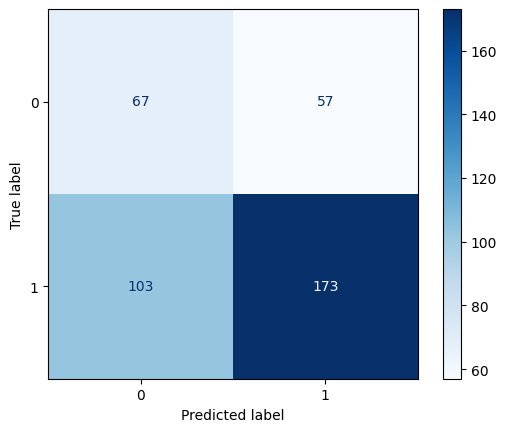

---------------------------
Performance Measures
---------------------------
Precision:, 0.7521739130434782
Recall:, 0.6268115942028986
F1 Score:, 0.6837944664031621
Accuracy Score: 0.6
-----------------------------
Hyperparameter Tuning Results
----------------------------
Best parameters:, {'var_smoothing': 1e-09}
Best score:", 0.7452240896358543
False Positive rate: 0.47580645161290325


In [190]:

#Splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= .60, random_state=42)

#Balancing
smote = SMOTE()
x_train_, y_train_ =  smote.fit_resample(x_train,y_train)


# Hyperparameter Tuning
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}
grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, cv=10, scoring='accuracy')
grid_search.fit(x_train_, y_train_)

# Training
n_b_best = grid_search.best_estimator_
n_b_best.fit(x_train_, y_train_)
predictions_ = n_b_best.predict(x_test)

#Performance
scores = n_b_best.score(x_test, y_test)
conf_mtrx = confusion_matrix(y_test, predictions_)
precision = precision_score(y_test, predictions_)
recall = recall_score(y_test, predictions_)
f1 = f1_score(y_test, predictions_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mtrx)

#Results
print('Confusion Matrix')
disp.plot(cmap='Blues', include_values=True)
plt.show();


print('---------------------------')
print('Performance Measures')
print('---------------------------')
print(f'Precision:, {precision}')
print(f'Recall:, {recall}')
print(f'F1 Score:, {f1}')
print(f'Accuracy Score: {scores}')
print('-----------------------------')
print('Hyperparameter Tuning Results')
print('----------------------------')
print(f'Best parameters:, {grid_search.best_params_}')
print(f'Best score:", {grid_search.best_score_}')
print(f'False Positive rate: {59 / (59+65)}')

### Simulating Best Score

Mean Score: 0.6337375


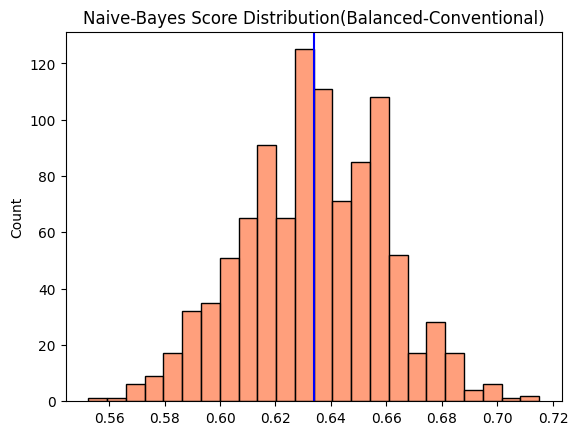

In [182]:
i = 0
n_b_score = []

while i < 1000:
    
    #Splitting
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= .60)

    #Balancing
    smote = SMOTE()
    x_train_, y_train_ =  smote.fit_resample(x_train,y_train)


    # Hyperparameter Tuning
    param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}
    grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, cv=10, scoring='accuracy')
    grid_search.fit(x_train_, y_train_)

    # Training
    n_b_best = grid_search.best_estimator_
    n_b_best.fit(x_train_, y_train_)
    predictions_ = n_b_best.predict(x_test)
    
    #Performance
    scores = n_b_best.score(x_test, y_test)
    n_b_score.append(scores)
    
 

    i += 1
print(f'Mean Score: {np.mean(n_b_score)}')


sns.histplot(data=n_b_score, color='coral')
plt.title('Naive-Bayes Score Distribution(Balanced-Conventional)')
plt.axvline(np.mean(n_b_score), color = 'blue')
plt.show();


## Summary

Purpose:

Predict if credit is "Good" or "Bad"

Business related questions:

- What are some of the features that people with "Good" credit have?
- What is the average age of applicants?
- What is the average amount people have in their checking and savings account?
- What is the most common property type?
- what is the most common sex/status with "Good" credit
- Does an applicant's demographics cause a deviation in the predicted category vs. what category they were actually placed in thus suggesting bias?


People with good credit t

In [183]:
df.columns

Index(['checking_account', 'duration_month', 'credit_history',
       'credit_purpose', 'credit_amount', 'savings_account',
       'present_employment', 'disposable_income_percent', 'status_sex',
       'debtors', 'property', 'age', 'other_installments', 'housing',
       'credits_at_current_bank', 'job', 'telephone', 'foreign_worker',
       'class'],
      dtype='object')

In [184]:
df_label_encoded = df.drop(columns=['checking_account', 'savings_account', 'telephone', 'other_installments', 'job'], axis = 1)